# 텍스트 마이닝

- 과제 10/18 (2) 교재 p.488~496 예제 풀기

## 클렌징

### 텍스트 토큰화

In [ ]:
# !pip install nltk

#### 문장 토큰화

In [1]:
# p.492 
from nltk import sent_tokenize
import nltk
# 마침표, 개행 문자등의 데이터세트 다운
# nltk.download('punkt')

text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
You can see it out your window or on your television. \
You feel it when you go to work, or go to church or pay your taxes.'

sentences = sent_tokenize(text=text_sample)
print(type(sentences), len(sentences))
print(sentences)

<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


#### 단어 토큰화

In [2]:
from nltk import word_tokenize

sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


#### 문서에 대한 모든 단어 토큰화

In [3]:
# p.494
from nltk import word_tokenize, sent_tokenize

# 여러 개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화하게 만드는 함수 생성
def tokenize_text(text):
    # 문장별로 분리 토큰
    sentences = sent_tokenize(text)
    # 분리된 문장별 단어 토큰화
    word_tokens = [word_tokenize(sentence) for sentence in sentences]
    return word_tokens
# 여러 문장에 대해 문장별 단어 토큰화 수행
word_tokens = tokenize_text(text_sample)
print(type(word_tokens), len(word_tokens))
print(word_tokens)
# 3개 문장을 문장별로 먼저 토큰화 해서 리스트 내포 형식이 됨

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


### 스톱 워드 제거

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
print('영어 stop words 개수:', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 개수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [6]:
# 스톱워드 필터링으로 제거하여 의미 있는 단어만 추출
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []
# 3개의 문장별로 얻은 words_tokens list에 대해 스톱 워드를 제거하는 반복문
for sentence in word_tokens :
    filtered_words=[]
    # 개별 문장별로 토큰화된 문장 list에 대해 스톱 워드를 제거하는 반복문
    for word in sentence:
        # 소문자로 모두 변환
        word = word.lower()
        # 토큰화된 개별 단어가 스톱 워드의 단어에 포함되지 않으면 word_tokens에 추가
        if word not in stopwords:
            filtered_words.append(word)
    all_tokens.append(filtered_words)
print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


### Stemming과 Lemmatization

In [7]:
# 단어의 원형 찾기 p.496~
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'), stemmer.stem('works'), stemmer.stem('worked'))
print(stemmer.stem('amusing'), stemmer.stem('amuses'), stemmer.stem('amused'))
print(stemmer.stem('happier'), stemmer.stem('happiest'))
print(stemmer.stem('fancier'), stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


In [8]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing','v'), lemma.lemmatize('amuses','v'), lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier', 'a'), lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier', 'a'), lemma.lemmatize('fanciest','a'))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


amuse amuse amuse
happy happy
fancy fancy


## BOW (Bag of Words)

###  Bow 피처 벡터화

- ML알고리즘은 숫자형 피처를 데이터로 받아 동작해서 텍스트와 같은 데이터는 바로 입력할 수가 없음.
- 텍스트를 특정 의미를 가지는 숫자형 값인 벡터 값으로 변환하는것.

- 카운트 기반의 벡터화
 - 단어 피처에 값을 부여할 때 각 문서에서 해당 단어가 나타나는 횟수.
- TF-IDF (Term Frequency - Inverse Document Frequency)기반의 벡터화
 - 개별 문서에서 자주 나타나는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 페널티를 주는 방식

CountVectorizer의 입력 파라미터 p.502
- max_df = 100 : 전체 문서에 걸쳐 100개 이하로 나타나는 단어만 피처로 추출
- min_df = 2 : 전체 문서에 걸쳐 2번 이하로 나타나는 단어는 추출하지 않음
- max_features = 2000 : 빈도순 정렬, 2000개 까지만 추출
- stop_words = 'english' : 영어의 스톱 워드로 지정된 단어는 추출에서 제외
- n_gram_range : (1,1)로 지정하면 토큰화된 단어 1개씩 추출
- analyzer : 추출 수행 단위 지정. 디폴트는 word (character등 적용 가능)
- token_pattern : 정규표현식 
= tokenizer : 커스텀

### 희소 행렬 - COO 형식

In [9]:
# p.504
import numpy as np

dense = np.array([[3,0,1],[0,2,0]])
dense

array([[3, 0, 1],
       [0, 2, 0]])

In [10]:
from scipy import sparse

# 0이 아닌 데이터 추출
data = np.array([3,1,2])

# 행 위치와 열 위치를 각각 배열로 생성
# dense 3,1,2의 행렬위치는 3 (0,0), 1 (0,2), 2 (1,1)
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

# sparse 패키지의 coo_matrix를 이용해 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos, col_pos)))
# data의,  행렬위치지정

In [11]:
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

In [12]:
# p.505
dense2 = np.array([[0,0,1,0,0,5],
                  [1,4,0,3,2,5],
                  [0,6,0,3,0,0],
                 [2,0,0,0,0,0],
                 [0,0,0,7,0,8],
                   [1,0,0,0,0,0]])
# 0이 아닌 데이터 추출
data2 = np.array([1,5,1,4,3,2,5,6,3,2,7,8,1])

# 행 위치와 열 위치를 각각 array로 생성
row_pos = ([0,0,1,1,1,1,1,2,2,3,4,4,5])
col_pos = ([2,5,0,1,3,4,5,1,3,0,3,5,0])

# COO 형식으로 변환
sparse_coo = sparse.coo_matrix((data2, (row_pos, col_pos)))

# CSR 형식
# 행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0,2,7,9,10,12,13])

# CSR 형식으로 변환
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


- 과제 10/19 (1) 10행 10열 희소행렬(0의 비중 70% 이상)을 생성한 후 COO, CSR 방식으로 변환하고 다시 희소행렬로 출력하기

In [13]:
# p.508 참조
dense3 = np.array([[0,1,0,0,0,5,0,0,0,6],
                  [0,0,3,3,0,0,0,0,1,0],
                  [1,1,7,0,0,0,0,0,0,0],
                 [1,0,0,4,0,0,9,0,0,0],
                 [0,0,0,0,0,0,0,0,0,4],
                   [0,1,0,2,0,3,0,4,0,5],
                  [3,0,4,0,0,1,0,0,0,0],
                  [0,0,0,0,0,9,0,0,0,0],
                  [0,8,0,0,0,0,5,0,0,0],
                  [5,0,0,0,0,0,0,6,0,0],])
# 0이 아닌 데이터 추출
data3 = np.array([1,5,6,3,3,1,1,1,7,1,4,9,4,1,2,3,4,5,3,4,1,9,8,5,5,6])

# 행 위치와 열 위치를 각각 array로 생성
row_pos = ([0,0,0,1,1,1,2,2,2,3,3,3,4,5,5,5,5,5,6,6,6,7,8,8,9,9])
col_pos = ([1,5,9,2,3,8,0,1,2,0,3,6,9,1,3,5,7,9,0,2,5,5,1,6,0,7])

# COO 형식으로 변환
sparse_coo = sparse.coo_matrix((data3, (row_pos, col_pos)))

# 행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0,3,6,9,12,13,18,21,22,24,26])

# CSR 형식으로 변환
sparse_csr = sparse.csr_matrix((data3, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 1 0 0 0 5 0 0 0 6]
 [0 0 3 3 0 0 0 0 1 0]
 [1 1 7 0 0 0 0 0 0 0]
 [1 0 0 4 0 0 9 0 0 0]
 [0 0 0 0 0 0 0 0 0 4]
 [0 1 0 2 0 3 0 4 0 5]
 [3 0 4 0 0 1 0 0 0 0]
 [0 0 0 0 0 9 0 0 0 0]
 [0 8 0 0 0 0 5 0 0 0]
 [5 0 0 0 0 0 0 6 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 1 0 0 0 5 0 0 0 6]
 [0 0 3 3 0 0 0 0 1 0]
 [1 1 7 0 0 0 0 0 0 0]
 [1 0 0 4 0 0 9 0 0 0]
 [0 0 0 0 0 0 0 0 0 4]
 [0 1 0 2 0 3 0 4 0 5]
 [3 0 4 0 0 1 0 0 0 0]
 [0 0 0 0 0 9 0 0 0 0]
 [0 8 0 0 0 0 5 0 0 0]
 [5 0 0 0 0 0 0 6 0 0]]


## 텍스트 분류 실습 - 20 뉴스그룹 분류

### 텍스트 정규화

In [14]:
# p.509~
from sklearn.datasets import fetch_20newsgroups

news_data = fetch_20newsgroups(subset='all', random_state=156)
news_data.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [15]:
news_data.data[0]

'From: egreen@east.sun.com (Ed Green - Pixel Cruncher)\nSubject: Re: Observation re: helmets\nOrganization: Sun Microsystems, RTP, NC\nLines: 21\nDistribution: world\nReply-To: egreen@east.sun.com\nNNTP-Posting-Host: laser.east.sun.com\n\nIn article 211353@mavenry.altcit.eskimo.com, maven@mavenry.altcit.eskimo.com (Norman Hamer) writes:\n> \n> The question for the day is re: passenger helmets, if you don\'t know for \n>certain who\'s gonna ride with you (like say you meet them at a .... church \n>meeting, yeah, that\'s the ticket)... What are some guidelines? Should I just \n>pick up another shoei in my size to have a backup helmet (XL), or should I \n>maybe get an inexpensive one of a smaller size to accomodate my likely \n>passenger? \n\nIf your primary concern is protecting the passenger in the event of a\ncrash, have him or her fitted for a helmet that is their size.  If your\nprimary concern is complying with stupid helmet laws, carry a real big\nspare (you can put a big or small 

In [16]:
news_data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [17]:
import pandas as pd

print('target 클래스의 값과 분포도 \n', pd.Series(news_data.target).value_counts().sort_index())
print('target 클래스의 이름들 \n', news_data.target_names)

target 클래스의 값과 분포도 
 0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628
dtype: int64
target 클래스의 이름들 
 ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [18]:
print(news_data.data[0])

From: egreen@east.sun.com (Ed Green - Pixel Cruncher)
Subject: Re: Observation re: helmets
Organization: Sun Microsystems, RTP, NC
Lines: 21
Distribution: world
Reply-To: egreen@east.sun.com
NNTP-Posting-Host: laser.east.sun.com

In article 211353@mavenry.altcit.eskimo.com, maven@mavenry.altcit.eskimo.com (Norman Hamer) writes:
> 
> The question for the day is re: passenger helmets, if you don't know for 
>certain who's gonna ride with you (like say you meet them at a .... church 
>meeting, yeah, that's the ticket)... What are some guidelines? Should I just 
>pick up another shoei in my size to have a backup helmet (XL), or should I 
>maybe get an inexpensive one of a smaller size to accomodate my likely 
>passenger? 

If your primary concern is protecting the passenger in the event of a
crash, have him or her fitted for a helmet that is their size.  If your
primary concern is complying with stupid helmet laws, carry a real big
spare (you can put a big or small head in a big helmet, bu

In [19]:
from sklearn.datasets import fetch_20newsgroups

# subset='train'으로 학습용 데이터만 추출, remove=('headers', 'footers', 'quotes')로 내용만 추출
train_news = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), random_state=156)

X_train = train_news.data
y_train = train_news.target
print(type(X_train))
# subset='test'로 테스트 데이터만 추출, remove=('headers', 'footers', 'quotes')로 내용만 추출
test_news = fetch_20newsgroups(subset='test',remove=('headers', 'footers', 'quotes'), random_state=156)

X_test = test_news.data
y_test = test_news.target
print('학습 데이터 크기 {0}, 테스트 데이터 크기 {1}'.format(len(train_news.data),
                                            len(test_news.data)))

<class 'list'>
학습 데이터 크기 11314, 테스트 데이터 크기 7532


In [20]:
# p.513
from sklearn.feature_extraction.text import CountVectorizer

# Count Vectorization으로 피처 벡터화 변환 수행
cnt_vect = CountVectorizer()
cnt_vect.fit(X_train) 
X_train_cnt_vect = cnt_vect.transform(X_train)

# 학습 데이터로 fit()된 CountVectorizer를 이용해 테스트 데이터를 피처 벡터화 변환 수행
X_test_cnt_vect = cnt_vect.transform(X_test)
# fit_transform을 테스트 데이터셋에 적용하면 안됨
# 피처 개수와 예측 시 사용할 피처 개수가 달라지기 때문

print('학습 데이터 텍스트의 CountVectorizer Shape:', X_train_cnt_vect.shape)

학습 데이터 텍스트의 CountVectorizer Shape: (11314, 101631)


In [21]:
# p.513
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# LogisticRegression을 이용하여 학습/예측/평가 수행.
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train_cnt_vect, y_train) # 벡터화 한 것을 사용해야함
pred = lr_clf.predict(X_test_cnt_vect)
print('CountVectorized Logistic Regression의 예측 정확도는{0:.3f}'.format(accuracy_score(y_test, pred)))

CountVectorized Logistic Regression의 예측 정확도는0.617


In [22]:
# p.514 Count 기반에서 TF=IDF 기반으로 벡터화를 변경해 예측 모델 수행
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 벡터화를 적용해 학습 데이터 세트와 테스트 데이터 세트 변환
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

# LogisticRegression을 이용해 학습/예측/평가 수행
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train_tfidf_vect, y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Logistic Regression 예측 정확도 : {0:.3f}'.format(accuracy_score(y_test, pred)))

TF-IDF Logistic Regression 예측 정확도 : 0.678


- 과제 10/19 (2)<br>
TfidfVectorizer 클래스의 stopword를 'english'로 변경하고 ngram_range={1,2}, max_df=300으로 다시 예측 성능 수행

In [23]:
# 더 다양한 파라미터 적용
tfidf_vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=300)
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

# LogisticRegression을 이용해 학습/예측/평가 수행
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train_tfidf_vect, y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression 예측 정확도 : {0:.3f}'.format(accuracy_score(y_test, pred)))

TF-IDF Vectorized Logistic Regression 예측 정확도 : 0.690


- 과제 10/19 (3) <br>
GridSearchCV를 이용해 하이퍼파라미터 튜닝을 수행하여 예측 성능을 개선

In [24]:
# p.515 GridSearchCV로 로지스틱 회귀의 하이퍼 파라미터 최적화 수행
from sklearn.model_selection import GridSearchCV

# 최적 C값 도출 튜닝 수행. CV는 3 폴드 세트로 설정0
params = {'C':[0.01, 0.1, 1, 5, 10]}
grid_cv_lr = GridSearchCV(lr_clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv_lr.fit(X_train_tfidf_vect, y_train)
print('Logistic Regression best C parameter :', grid_cv_lr.best_params_)

# 최적 C값으로 학습된 grid_cv로 예측 및 정확도 평가
pred = grid_cv_lr.predict(X_test_tfidf_vect)
print('TF-DF Vectorized Logistic Regression 예측 정확도 : {0:.3f}'.format(accuracy_score(y_test, pred)))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Logistic Regression best C parameter : {'C': 10}
TF-DF Vectorized Logistic Regression 예측 정확도 : 0.704


## 감성분석

### 감성분석 - IMDB 영화평

In [25]:
import pandas as pd

review_df = pd.read_csv('./dataset/labeledTrainData.tsv', header=0, sep="\t", quoting=3)
review_df.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [26]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


- semtiment : 영화평(review)의 sentiment 결과값(Target Label). 1은 긍정, 0은 부정적 평가
- review : 영화평의 텍스트

In [27]:
review_df['review'][0]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally

In [28]:
# html형식이라 <br />같은 태그 존재. 정규식으로 삭제
import re

# <br> html 태그는 replace 함수로 공백으로 변환
review_df['review'] = review_df['review'].str.replace('<br />', ' ')

# 파이썬의 정규 표현식 모듈인 re를 이용해 영어 문자열이 아닌 문자는 모두 공백으로 변환
review_df['review'] = review_df['review'].apply(lambda x:re.sub("[^a-zA-Z]", " ", x) )

In [29]:
# 결정 값 클래스인 sentiment 칼럼을 별도로 추출해 결정 값 데이터 생성
# 원본데이터에서 id와 sentiment 칼럼 삭제 후 학습용/테스트용 데이터 분리
from sklearn.model_selection import train_test_split

class_df = review_df['sentiment']
feature_df = review_df.drop(['id', 'sentiment'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(feature_df, class_df, test_size=0.3, random_state=156)

X_train.shape, X_test.shape

((17500, 1), (7500, 1))

In [30]:
# p.522. 벡터화, 모델링, 평가
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# 스톱 워드는 english, filtering, ngram은 (1,2)로 CountVectorization 수행
# LogisticRegression 의 C는 10으로 설정
pipeline = Pipeline([
    ('cnt_vect', CountVectorizer(stop_words='english', ngram_range=(1,2))),
    ('lr_clf', LogisticRegression(solver='liblinear', C=10))])

# Pipeline 객체를 이용해 fit(), predict()로 학습/예측 수행. predict_proba()는 roc_auc 때문에 수행
pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]

print('예측 정확도 : {0:.4f}, ROC-AUC : {1:.4f}'.format(accuracy_score(y_test, pred),
                                                  roc_auc_score(y_test, pred_probs)))

예측 정확도 : 0.8860, ROC-AUC : 0.9503


- 과제 10/19 (4)<br>
TF-IDF 벡터화를 적용하여 수행(스톱워드, ngram을 추가)

In [31]:
# p.523. TD-IDF 벡터화로 예측 성능 측정
# 그냥 Pipeline에서 CountVectorizer를 TdidfVectorizer로 변경

# 스톱 워드는 english, filtering, ngram은 (1,2)로 TD-IDF 수행
# LogisticRegression 의 C는 10으로 설정
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2))),
    ('lr_clf', LogisticRegression(solver='liblinear', C=10))])

# Pipeline 객체를 이용해 fit(), predict()로 학습/예측 수행. predict_proba()는 roc_auc 때문에 수행
pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]

print('예측 정확도 : {0:.4f}, ROC-AUC : {1:.4f}'.format(accuracy_score(y_test, pred),
                                                  roc_auc_score(y_test, pred_probs)))

예측 정확도 : 0.8936, ROC-AUC : 0.9598


### 비지도학습 기반 감성 분석

### SentiWordNet을 이용한 감성 분석

In [32]:
# p.525
import nltk
# nltk.download('all')

In [33]:
from nltk.corpus import wordnet as wn
import pandas as pd
term = 'present'

# 'present'라는 단어로 wordnet의 synsets 생성
# semantic : 문맥상 의미
# p.524 synset : semantic 정보를 위해 각각의 품사로 구성된 개별 단어
synsets = wn.synsets(term)
print('synsets() 반환 type :', type(synsets))
print('synsets() 반환 값 개수:', len(synsets))
print('synsets() 반환 값:', synsets)
# 반환 값 개수 : 단어의 의미 개수가 그만큼 있다는것

synsets() 반환 type : <class 'list'>
synsets() 반환 값 개수: 18
synsets() 반환 값: [Synset('present.n.01'), Synset('present.n.02'), Synset('present.n.03'), Synset('show.v.01'), Synset('present.v.02'), Synset('stage.v.01'), Synset('present.v.04'), Synset('present.v.05'), Synset('award.v.01'), Synset('give.v.08'), Synset('deliver.v.01'), Synset('introduce.v.01'), Synset('portray.v.04'), Synset('confront.v.03'), Synset('present.v.12'), Synset('salute.v.06'), Synset('present.a.01'), Synset('present.a.02')]


In [34]:
for synset in synsets :
    print('### Synset name : ', synset.name(), '###')
    print('POS :', synset.lexname())
    print('Definition:', synset.definition())
    print('Lemmas:', synset.lemma_names())

### Synset name :  present.n.01 ###
POS : noun.time
Definition: the period of time that is happening now; any continuous stretch of time including the moment of speech
Lemmas: ['present', 'nowadays']
### Synset name :  present.n.02 ###
POS : noun.possession
Definition: something presented as a gift
Lemmas: ['present']
### Synset name :  present.n.03 ###
POS : noun.communication
Definition: a verb tense that expresses actions or states at the time of speaking
Lemmas: ['present', 'present_tense']
### Synset name :  show.v.01 ###
POS : verb.perception
Definition: give an exhibition of to an interested audience
Lemmas: ['show', 'demo', 'exhibit', 'present', 'demonstrate']
### Synset name :  present.v.02 ###
POS : verb.communication
Definition: bring forward and present to the mind
Lemmas: ['present', 'represent', 'lay_out']
### Synset name :  stage.v.01 ###
POS : verb.creation
Definition: perform (a play), especially on a stage
Lemmas: ['stage', 'present', 'represent']
### Synset name :  p

In [35]:
# synset 객체를 단어별로 생성
tree = wn.synset('tree.n.01')
lion = wn.synset('lion.n.01')
tiger = wn.synset('tiger.n.02')
cat = wn.synset('cat.n.01')
dog = wn.synset('dog.n.01')

entities = [tree, lion, tiger, cat, dog]
similarities = []
entity_names = [entity.name().split('.')[0] for entity in entities]

# 단어별 synset 반복하면서 다른 단어의 synset과 유사도 측정
for entity in entities :
    similarity = [round(entity.path_similarity(compared_entity), 2)
                 for compared_entity in entities]
    similarities.append(similarity)
    
# 개별 단어별 synset과 다른 단어의 synset과의 유사도를 df로 저장
similarity_df = pd.DataFrame(similarities, columns=entity_names, index=entity_names)
similarity_df

,tree,lion,tiger,cat,dog
tree,1.00,0.07,0.07,0.08,0.12
lion,0.07,1.00,0.33,0.25,0.17
tiger,0.07,0.33,1.00,0.25,0.17
cat,0.08,0.25,0.25,1.00,0.20
dog,0.12,0.17,0.17,0.20,1.00


In [36]:
import nltk
from nltk.corpus import sentiwordnet as swn

senti_synsets = list(swn.senti_synsets('slow'))
print('senti_synsets() 반환 type :', type(senti_synsets))
print('senti_synsets() 반환 값 개수:', len(senti_synsets))
print('senti_synsets() 반환 값 :', senti_synsets)

senti_synsets() 반환 type : <class 'list'>
senti_synsets() 반환 값 개수: 11
senti_synsets() 반환 값 : [SentiSynset('decelerate.v.01'), SentiSynset('slow.v.02'), SentiSynset('slow.v.03'), SentiSynset('slow.a.01'), SentiSynset('slow.a.02'), SentiSynset('dense.s.04'), SentiSynset('slow.a.04'), SentiSynset('boring.s.01'), SentiSynset('dull.s.08'), SentiSynset('slowly.r.01'), SentiSynset('behind.r.03')]


In [37]:
import nltk
from nltk.corpus import sentiwordnet as swn

father = swn.senti_synset('father.n.01')
print('father 긍정감성 지수 : ', father.pos_score())
print('father 부정감성 지수 : ', father.neg_score())
print('father 객관성 지수 : ', father.obj_score())
print('\n')
fabulous = swn.senti_synset('fabulous.a.01')
print('fabulous 긍정감성 지수: ', fabulous.pos_score())
print('fabulous 부정감성 지수: ', fabulous.neg_score())

father 긍정감성 지수 :  0.0
father 부정감성 지수 :  0.0
father 객관성 지수 :  1.0


fabulous 긍정감성 지수:  0.875
fabulous 부정감성 지수:  0.125


- 과제 10/19 (5)<br>
SentiWordNet을 이용한 영화 감상평 감성분석을 수행하세요

#### SentiWordNet을 이용한 영화 감상평 감성 분석

개략적인 순서
1. 문서(document)를 문장(sentence) 단위로 분해
2. 다시 문장을 단어(word) 단위로 토큰화하고 품사 태깅
3. 품사 태깅된 단어 기반으로 synset 객체와 senti_synset 객체를 생성
4. senti_synset에서 긍정감성/부정감성 지수를 구하고 이를 모두 합산해 트정 임계치 값 이상일 때 긍정 감성으로, 그렇지 않을 때는 부정 감성으로 결정

In [38]:
# p.530
from nltk.corpus import wordnet as wn

# 간단한 NTLK PennTreebank Tag를 기반으로 WordNet 기반의 품사 Tag로 변환
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB

In [39]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag

def swn_polarity(text):
    # 감성 지수 초기화
    sentiment = 0.0
    tokens_count = 0
    
    lemmatizer = WordNetLemmatizer()
    raw_sentences = sent_tokenize(text)
    # 분해된 문장별로 단어 토큰 -> 품사 태깅 후에 SentiSynset 생성 -> 감성 지수 합산
    for raw_sentence in raw_sentences:
        # NLTK 기반의 품사 태깅 문장 추출
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))
        for word, tag in tagged_sentence:
            
            # WordNet 기반 품사 태깅과 어근 추출
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
                continue
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma :
                continue
            # 어근을 추출한 단어와 WordNet 기반 품사 태깅을 입력해 Synset 객체를 생성.
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue
            # sentiwordnet의 감성 단어 분석으로 감성 synset 추출
            # 모든 단어에 대해 긍정 감성 지수는 +로 부정 감성 지수는 -로 합산해 감성 지수 계산.
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment += (swn_synset.pos_score() - swn_synset.neg_score())
            tokens_count += 1
            
    if not tokens_count:
        return 0
    
    # 총 score가 0 이상일 경우 긍정(Positive) 1, 그젛지 않을 경우 부정(Negative) 0 반환
    if sentiment >= 0 :
        return 1
    
    return 0

In [40]:
# review_df사용. 앞에 지도학습에서 사용한 df. p521
# p.531
train_df = review_df
train_df['preds'] = train_df['review'].apply(lambda x: swn_polarity(x))
y_target = train_df['sentiment'].values
preds = train_df['preds'].values

In [41]:
# SentiWordNet의 감성 분석 예측 성능
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
import numpy as np

print(confusion_matrix(y_target, preds))
print("정확도:", np.round(accuracy_score(y_target, preds), 4))
print("정밀도:", np.round(precision_score(y_target, preds), 4))
print("재현율:", np.round(recall_score(y_target, preds), 4))

[[7668 4832]
 [3636 8864]]
정확도: 0.6613
정밀도: 0.6472
재현율: 0.7091


### VADER를 이용한 감성 분석

In [42]:
# p.532
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()
senti_scores = senti_analyzer.polarity_scores(train_df['review'][0])
print(senti_scores)

{'neg': 0.13, 'neu': 0.743, 'pos': 0.127, 'compound': -0.7943}


In [43]:
# p.533
def vader_polarity(review, threshold=0.1):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    
    # compound 값에 기반해 threshold 입력값보다 크면 1, 그렇지 않으면 0을 반환
    agg_score = scores['compound']
    final_sentiment = 1 if agg_score >= threshold else 0
    return final_sentiment

# apply lambda 식을 이용해 레코드별로 vader_polarity()를 수행하고 결과를 'vader_preds'에 저장
review_df['vader_preds'] = review_df['review'].apply(lambda x: vader_polarity(x,0.1))
y_target = review_df['sentiment'].values
vader_preds = review_df['vader_preds'].values

print(confusion_matrix(y_target, vader_preds))
print("정확도:", np.round(accuracy_score(y_target, vader_preds),4))
print("정밀도:", np.round(precision_score(y_target, vader_preds),4))
print("재현율:", np.round(recall_score(y_target, vader_preds),4))

[[ 6747  5753]
 [ 1858 10642]]
정확도: 0.6956
정밀도: 0.6491
재현율: 0.8514


## 문서 군집화

### Opinion Review 데이터 세트를 이용한 문서 군집화 수행

In [44]:
# p.540
import pandas as pd
import glob, os
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', 700)
path = r'OpinosisDataset1.0\topics' # 해당 경로(여기는 같은 폴더 안이라 생략) 안에 있는 폴더 경로 설정
# m8에 OpinosisDataset1.0 폴더 있음
# .data파일들 파일명을 리스트로 취합
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

# 개별 파일들 파일명은 filename_list 리스트로 취합
# 개별 파일들 파일 내용은 df 로딩 후 다시 str로 변환하여 opinion_text 리스트로 취합
for file_ in all_files :
    # 개별 파일을 읽어서 DataFrame으로 생성
    df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
    
    # 절대경로로 주어진 파일명을 가공. Linux에서 수행 시에는 아래 \\를 /로 변경
    # 맨 마지막 .data 확장자도 제거
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]
    
    # 파일명 리스트와 파일 내용 리스트에 파일명과 파일 내용을 추가
    filename_list.append(filename)
    opinion_text.append(df.to_string())
    
# 파일명 리스트와 파일 내용 리스트를 DataFrame으로 생성
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

,filename,opinion_text
0,accuracy_garmin_nuvi_255W_gps,", and is very, very accurate .\n0 but for the most part, we find that the Garmin software provides accurate directions, whereever we intend to go .\n1 This functi..."
1,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and very comfortable beds, a great shower and very clean bathrooms .\n0 The second room was smaller, with a very inconvenient bathroom layout, but at least it was quieter and we were able to sleep .\n1 ..."
2,battery-life_amazon_kindle,"After I plugged it in to my USB hub on my computer to charge the battery the charging cord design is very clever !\n0 After you have paged tru a 500, page book one, page, at, a, time to get from Chapter 2 to Chapter 15, see how excited you are about a low battery and all the time it took to get there !\n1 ..."
3,battery-life_ipod_nano_8gb,short battery life I moved up from an 8gb .\n0 I love this ipod except for the battery life .\n1 ...
4,battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 23Wh Li, ion Battery , and a 1 .\n0 Not to mention that as of now..."


In [45]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

# 입력으로 들어온 token단어들에 대해서 lemmatization 어근 변환. 
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

# TfidfVectorizer 객체 생성 시 tokenizer인자로 해당 함수를 설정하여 lemmatization 적용
# 입력으로 문장을 받아서 stop words 제거-> 소문자 변환 -> 단어 토큰화 -> lemmatization 어근 변환. 
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [46]:
# p.541
# TD-IDF 형태로 피처 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english', \
                            ngram_range=(1,2), min_df=0.05, max_df=0.85)
# opinion_text 칼럼값으로 feature vectorization 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

In [47]:
# 결과를 레이블값으로 달아주기
from sklearn.cluster import KMeans
# 5개 집합으로 군집화 수행(n_clusters=5). 예제를 위해 동일한 클러스터링 결과 도출용 random_state=0
km_cluster = KMeans(n_clusters=5, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

In [48]:
document_df['cluster_label'] = cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,", and is very, very accurate .\n0 but for the most part, we find that the Garmin software provides accurate directions, whereever we intend to go .\n1 This functi...",2
1,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and very comfortable beds, a great shower and very clean bathrooms .\n0 The second room was smaller, with a very inconvenient bathroom layout, but at least it was quieter and we were able to sleep .\n1 ...",0
2,battery-life_amazon_kindle,"After I plugged it in to my USB hub on my computer to charge the battery the charging cord design is very clever !\n0 After you have paged tru a 500, page book one, page, at, a, time to get from Chapter 2 to Chapter 15, see how excited you are about a low battery and all the time it took to get there !\n1 ...",1
3,battery-life_ipod_nano_8gb,short battery life I moved up from an 8gb .\n0 I love this ipod except for the battery life .\n1 ...,1
4,battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 23Wh Li, ion Battery , and a 1 .\n0 Not to mention that as of now...",1


In [49]:
# cluster_label=0 인 데이터
document_df[document_df['cluster_label']==0].sort_values(by='filename')
# cluster 0은 호텔에 대한 리뷰로 군집화 된 것 확인

,filename,opinion_text,cluster_label
1,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and very comfortable beds, a great shower and very clean bathrooms .\n0 The second room was smaller, with a very inconvenient bathroom layout, but at least it was quieter and we were able to sleep .\n1 ...",0
32,room_holiday_inn_london,"We arrived at 23,30 hours and they could not recommend a restaurant so we decided to go to Tesco, with very limited choices but when you are hingry you do not careNext day they rang the bell at 8,00 hours to clean the room, not being very nice being waken up so earlyEvery day they gave u...",0
30,rooms_bestwestern_hotel_sfo,"Great Location , Nice Rooms , H...",0
31,rooms_swissotel_chicago,"The Swissotel is one of our favorite hotels in Chicago and the corner rooms have the most fantastic views in the city .\n0 The rooms look like they were just remodled and upgraded, there was an HD TV and a nice iHome docking station to put my iPod so I could set the alarm to wake up with my music instead of the radio .\n1 ...",0


In [50]:
# cluster_label=1 인 데이터
document_df[document_df['cluster_label']==1].sort_values(by='filename')
# cluster 1은 킨들, 아이팟, 넷북 등 전자기기에 대한 리뷰로 군집화 된 것 확인

,filename,opinion_text,cluster_label
2,battery-life_amazon_kindle,"After I plugged it in to my USB hub on my computer to charge the battery the charging cord design is very clever !\n0 After you have paged tru a 500, page book one, page, at, a, time to get from Chapter 2 to Chapter 15, see how excited you are about a low battery and all the time it took to get there !\n1 ...",1
3,battery-life_ipod_nano_8gb,short battery life I moved up from an 8gb .\n0 I love this ipod except for the battery life .\n1 ...,1
4,battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 23Wh Li, ion Battery , and a 1 .\n0 Not to mention that as of now...",1
19,keyboard_netbook_1005ha,", I think the new keyboard rivals the great hp mini keyboards .\n0 Since the battery life difference is minimum, the only reason to upgrade would be to get the better keyboard .\n1 The keyboard is now as good as t...",1
26,performance_netbook_1005ha,"The Eee Super Hybrid Engine utility lets users overclock or underclock their Eee PC's to boost performance or provide better battery life depending on their immediate requirements .\n0 In Super Performance mode CPU, Z shows the bus speed to increase up to 169 .\n1 One...",1
41,size_asus_netbook_1005ha,"A few other things I'd like to point out is that you must push the micro, sized right angle end of the ac adapter until it snaps in place or the battery may not charge .\n0 The full size right shift k...",1
42,sound_ipod_nano_8gb,headphone jack i got a clear case for it and it i got a clear case for it and it like prvents me from being able to put the jack all the way in so the sound can b messsed up or i can get it in there and its playing well them go to move or something and it slides out .\n0 Picture and sound quality are excellent for this typ of devic .\n1 ...,1
44,speed_windows7,"Windows 7 is quite simply faster, more stable, boots faster, goes to sleep faster, comes back from sleep faster, manages your files better and on top of that it's beautiful to look at and easy to use .\n0 , faster about 20% to 30% faster at running applications than my Vista , seriously\n1 ...",1


In [51]:
# cluster_label=2 인 데이터
document_df[document_df['cluster_label']==2].sort_values(by='filename')
# cluster 2은 킨들 등이 있지만 주로 차량용 네비게이션에 대한 리뷰로 군집화 된 것 확인(~nuvi:차량네비리뷰)

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,", and is very, very accurate .\n0 but for the most part, we find that the Garmin software provides accurate directions, whereever we intend to go .\n1 This functi...",2
5,buttons_amazon_kindle,"I thought it would be fitting to christen my Kindle with the Stephen King novella UR, so went to the Amazon site on my computer and clicked on the button to buy it .\n0 As soon as I'd clicked the button to confirm my order it appeared on my Kindle almost immediately !\n1 ...",2
8,directions_garmin_nuvi_255W_gps,You also get upscale features like spoken directions including street names and programmable POIs .\n0 I used to hesitate to go out of my directions but no...,2
9,display_garmin_nuvi_255W_gps,"3 quot widescreen display was a bonus .\n0 This made for smoother graphics on the 255w of the vehicle moving along displayed roads, where the 750's display was more of a jerky movement .\n1 ...",2
10,eyesight-issues_amazon_kindle,"It feels as easy to read as the K1 but doesn't seem any crisper to my eyes .\n0 the white is really GREY, and to avoid considerable eye, strain I had to refresh pages every other page .\n1 The dream has always been a portable electronic device that could hold a ton of reading material, automate subscriptions and fa...",2
11,features_windows7,"I had to uninstall anti, virus and selected other programs, some of which did not have listings in the Programs and Features Control Panel section .\n0 This review briefly touches upon some of the key features and enhancements of Microsoft's latest OS .\n1 ...",2
12,fonts_amazon_kindle,"Being able to change the font sizes is awesome !\n0 For whatever reason, Amazon decided to make the Font on the Home Screen ...",2
23,navigation_amazon_kindle,"In fact, the entire navigation structure has been completely revised , I'm still getting used to it but it's a huge step forward .\n0 ...",2
33,satellite_garmin_nuvi_255W_gps,"It's fast to acquire satellites .\n0 If you've ever had a Brand X GPS take you on some strange route that adds 20 minutes to your trip, has you turn the wrong way down a one way road, tell you to turn AFTER you've passed the street, frequently loses the satellite signal, or has old maps missing streets, you know how important this stuff is .\n1 ...",2
34,screen_garmin_nuvi_255W_gps,It is easy to read and when touching the screen it works great !\n0 and zoom out buttons on the 255w to the same side of the screen which makes it a bit easier .\n1 ...,2


In [52]:
# cluster_label=3 인 데이터
document_df[document_df['cluster_label']==3].sort_values(by='filename')
# cluster 3은 대부분 호텔 리뷰로 군집화 된 것 확인

,filename,opinion_text,cluster_label
13,food_holiday_inn_london,The room was packed to capacity with queues at the food buffets .\n0 The over zealous staff cleared our unfinished drinks while we were collecting cooked food and movement around the room with plates was difficult in the crowded circumstances .\n1 ...,3
14,food_swissotel_chicago,The food for our event was delicious .\n0 ...,3
15,free_bestwestern_hotel_sfo,The wine reception is a great idea as it is nice to meet other travellers and great having access to the free Internet access in our room .\n0 They also have a computer available with free internet which is a nice bonus but I didn't find that out till the day before we left but was still able to get on there to check our flight to Vegas the next day .\n1 ...,3
20,location_bestwestern_hotel_sfo,"Good Value good location , ideal choice .\n0 Great Location , Nice Rooms , Helpless Concierge\n1 ...",3
21,location_holiday_inn_london,"Great location for tube and we crammed in a fair amount of sightseeing in a short time .\n0 All in all, a normal chain hotel on a nice lo...",3
24,parking_bestwestern_hotel_sfo,Parking was expensive but I think this is common for San Fran .\n0 there is a fee for parking but well worth it seeing no where to park if you do have a car .\n1 ...,3
27,price_amazon_kindle,"If a case was included, as with the Kindle 1, that would have been reflected in a higher price .\n0 lower overall price, with nice leather cover .\n1 ...",3
28,price_holiday_inn_london,"All in all, a normal chain hotel on a nice location , I will be back if I do not find anthing closer to Picadilly for a better price .\n0 ...",3
38,service_bestwestern_hotel_sfo,"Both of us having worked in tourism for over 14 years were very disappointed at the level of service provided by this gentleman .\n0 The service was good, very friendly staff and we loved the free wine reception each night .\n1 ...",3
39,service_holiday_inn_london,"not customer, oriented hotelvery low service levelboor reception\n0 The room was quiet, clean, the bed and pillows were comfortable, and the serv...",3


In [53]:
# cluster_label=4 인 데이터
document_df[document_df['cluster_label']==4].sort_values(by='filename')
# cluster 4은 자동차 리뷰로 군집화 된 것 확인

,filename,opinion_text,cluster_label
6,comfort_honda_accord_2008,"Drivers seat not comfortable, the car itself compared to other models of similar class .\n0 ...",4
7,comfort_toyota_camry_2007,"Ride seems comfortable and gas mileage fairly good averaging 26 city and 30 open road .\n0 Seats are fine, in fact of all the smaller sedans this is the most comfortable I found for the price as I am 6', 2 and 250# .\n1 Great gas mileage and comfortable on long trips ...",4
16,gas_mileage_toyota_camry_2007,Ride seems comfortable and gas mileage fairly good averaging 26 city and 30 open road .\n0 ...,4
17,interior_honda_accord_2008,I love the new body style and the interior is a simple pleasure except for the center dash .\n0 ...,4
18,interior_toyota_camry_2007,"First of all, the interior has way too many cheap plastic parts like the cheap plastic center piece that houses the clock .\n0 3 blown struts at 30,000 miles, interior trim coming loose and rattling squeaking, stains on paint, and bug splats taking paint off, premature uneven brake wear, on 3rd windsh...",4
22,mileage_honda_accord_2008,"It's quiet, get good gas mileage and looks clean inside and out .\n0 The mileage is great, and I've had to get used to stopping less for gas .\n1 Thought gas ...",4
25,performance_honda_accord_2008,"Very happy with my 08 Accord, performance is quite adequate it has nice looks and is a great long, distance cruiser .\n0 6, 4, 3 eco engine has poor performance and gas mileage of 22 highway .\n1 Overall performance is good but comfort level is poor .\n2 ...",4
29,quality_toyota_camry_2007,I previously owned a Toyota 4Runner which had incredible build quality and reliability .\n0 I bought the Camry because of Toyota reliability and qua...,4
37,seats_honda_accord_2008,"Front seats are very uncomfortable .\n0 No memory seats, no trip computer, can only display outside temp with trip odometer .\n1 ...",4
47,transmission_toyota_camry_2007,"After slowing down, transmission has to be kicked to speed up .\n0 ...",4


In [54]:
from sklearn.cluster import KMeans
# 3개의 집합으로 군집화
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_

# 소속 클러스터를 cluster_label 칼럼으로 할당하고 cluster_label 값으로 정렬
document_df['cluster_label'] = cluster_label
document_df.sort_values(by='cluster_label')

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,", and is very, very accurate .\n0 but for the most part, we find that the Garmin software provides accurate directions, whereever we intend to go .\n1 This functi...",0
48,updates_garmin_nuvi_255W_gps,"Another thing to consider was that I paid $50 less for the 750 and it came with the FM transmitter cable and a USB cord to connect it to your computer for updates and downloads .\n0 update and reroute much _more_ quickly than my other GPS .\n1 UPDATE ON THIS , It finally turned out that to see the elevation contours at lowe...",0
44,speed_windows7,"Windows 7 is quite simply faster, more stable, boots faster, goes to sleep faster, comes back from sleep faster, manages your files better and on top of that it's beautiful to look at and easy to use .\n0 , faster about 20% to 30% faster at running applications than my Vista , seriously\n1 ...",0
43,speed_garmin_nuvi_255W_gps,Another feature on the 255w is a display of the posted speed limit on the road which you are currently on right above your current displayed speed .\n0 I found myself not even looking at my car speedometer as I could easily see my current speed and the speed limit of my route at a glance .\n1 ...,0
42,sound_ipod_nano_8gb,headphone jack i got a clear case for it and it i got a clear case for it and it like prvents me from being able to put the jack all the way in so the sound can b messsed up or i can get it in there and its playing well them go to move or something and it slides out .\n0 Picture and sound quality are excellent for this typ of devic .\n1 ...,0
41,size_asus_netbook_1005ha,"A few other things I'd like to point out is that you must push the micro, sized right angle end of the ac adapter until it snaps in place or the battery may not charge .\n0 The full size right shift k...",0
36,screen_netbook_1005ha,Keep in mind that once you get in a room full of light or step outdoors screen reflections could become annoying .\n0 I've used mine outsi...,0
35,screen_ipod_nano_8gb,"As always, the video screen is sharp and bright .\n0 2, inch screen and a glossy, polished aluminum finish that one CNET editor described as looking like a Christmas tree ornament .\n1 ...",0
34,screen_garmin_nuvi_255W_gps,It is easy to read and when touching the screen it works great !\n0 and zoom out buttons on the 255w to the same side of the screen which makes it a bit easier .\n1 ...,0
33,satellite_garmin_nuvi_255W_gps,"It's fast to acquire satellites .\n0 If you've ever had a Brand X GPS take you on some strange route that adds 20 minutes to your trip, has you turn the wrong way down a one way road, tell you to turn AFTER you've passed the street, frequently loses the satellite signal, or has old maps missing streets, you know how important this stuff is .\n1 ...",0


In [55]:
# 클러스터 0은 포터블 전자기기 리뷰로만 군집화
document_df[document_df['cluster_label']==0].sort_values(by='filename').head()

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,", and is very, very accurate .\n0 but for the most part, we find that the Garmin software provides accurate directions, whereever we intend to go .\n1 This functi...",0
2,battery-life_amazon_kindle,"After I plugged it in to my USB hub on my computer to charge the battery the charging cord design is very clever !\n0 After you have paged tru a 500, page book one, page, at, a, time to get from Chapter 2 to Chapter 15, see how excited you are about a low battery and all the time it took to get there !\n1 ...",0
3,battery-life_ipod_nano_8gb,short battery life I moved up from an 8gb .\n0 I love this ipod except for the battery life .\n1 ...,0
4,battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 23Wh Li, ion Battery , and a 1 .\n0 Not to mention that as of now...",0
5,buttons_amazon_kindle,"I thought it would be fitting to christen my Kindle with the Stephen King novella UR, so went to the Amazon site on my computer and clicked on the button to buy it .\n0 As soon as I'd clicked the button to confirm my order it appeared on my Kindle almost immediately !\n1 ...",0


In [56]:
# 클러스터 1은 자동차 리뷰로만 군집화
document_df[document_df['cluster_label']==1].sort_values(by='filename').head(3)

,filename,opinion_text,cluster_label
6,comfort_honda_accord_2008,"Drivers seat not comfortable, the car itself compared to other models of similar class .\n0 ...",1
7,comfort_toyota_camry_2007,"Ride seems comfortable and gas mileage fairly good averaging 26 city and 30 open road .\n0 Seats are fine, in fact of all the smaller sedans this is the most comfortable I found for the price as I am 6', 2 and 250# .\n1 Great gas mileage and comfortable on long trips ...",1
16,gas_mileage_toyota_camry_2007,Ride seems comfortable and gas mileage fairly good averaging 26 city and 30 open road .\n0 ...,1


In [57]:
# 클러스터 2는 호텔 리뷰로만 군집화
document_df[document_df['cluster_label']==2].sort_values(by='filename').head(3)

,filename,opinion_text,cluster_label
1,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and very comfortable beds, a great shower and very clean bathrooms .\n0 The second room was smaller, with a very inconvenient bathroom layout, but at least it was quieter and we were able to sleep .\n1 ...",2
13,food_holiday_inn_london,The room was packed to capacity with queues at the food buffets .\n0 The over zealous staff cleared our unfinished drinks while we were collecting cooked food and movement around the room with plates was difficult in the crowded circumstances .\n1 ...,2
14,food_swissotel_chicago,The food for our event was delicious .\n0 ...,2


### 군집별 핵심 단어 추출하기

In [58]:
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape :', cluster_centers.shape)
print(cluster_centers) # 군집 3개, word피처 4611개

cluster_centers shape : (3, 4611)
[[0.01005322 0.         0.         ... 0.00706287 0.         0.        ]
 [0.         0.00092551 0.         ... 0.         0.         0.        ]
 [0.         0.00099499 0.00174637 ... 0.         0.00183397 0.00144581]]


- 과제 10/20 (1)<br>상기 군집별 핵심 단어 10개를 아래와 같은 형태로 출력하세요.<br>
개별 군집번호, 핵심단어-중요도 순서, 파일명

In [59]:
# p.547
# 군집별 top n 핵심 단어, 그 단어의 중심 위치 상댓값, 대상 파일명을 반환
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=10):
    cluster_details = {}
    
    # centroid(군집중심점)별 할당된 word 피처들의 거리값이 큰 순으로 값 구하기 위해 정렬
    # 인덱스 내림차순으로 반환
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1]
    
    # 개별 군집별로 반복하면서 핵심 단어, 그 단어의 중심 위치 상댓값, 대상 파일명 입력
    for cluster_num in range(clusters_num):
        # 개별 군집별 정보를 담을 데이터 초기화
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        # cluster_centers_.argsort()[:,::-1]로 구한 인덱스를 이용해 top n 피처 단어를 구함.
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [feature_names[ind] for ind in top_feature_indexes]
        
        # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함
        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()
        
        # cluster_details 딕셔너리 객체에 개별 군집별 핵심단어와 중심위치 상댓값, 해당 파일명 입력
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
        filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['filename']
        filenames = filenames.values.tolist()
        
        cluster_details[cluster_num]['filenames'] = filenames
        
    return cluster_details

In [60]:
def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('### Cluster {0}'.format(cluster_num))
        print('Top features:', cluster_detail['top_features'])
        print('Reviews 파일명:', cluster_detail['filenames'][:7])
        print('===============================================')

In [61]:
feature_names = tfidf_vect.get_feature_names()

cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=document_df,
                                     feature_names=feature_names, clusters_num=3, top_n_features=10)
print_cluster_details(cluster_details)

### Cluster 0
Top features: ['screen', 'battery', 'keyboard', 'battery life', 'life', 'kindle', 'direction', 'video', 'size', 'voice']
Reviews 파일명: ['accuracy_garmin_nuvi_255W_gps', 'battery-life_amazon_kindle', 'battery-life_ipod_nano_8gb', 'battery-life_netbook_1005ha', 'buttons_amazon_kindle', 'directions_garmin_nuvi_255W_gps', 'display_garmin_nuvi_255W_gps']
### Cluster 1
Top features: ['interior', 'seat', 'mileage', 'comfortable', 'gas', 'gas mileage', 'transmission', 'car', 'performance', 'quality']
Reviews 파일명: ['comfort_honda_accord_2008', 'comfort_toyota_camry_2007', 'gas_mileage_toyota_camry_2007', 'interior_honda_accord_2008', 'interior_toyota_camry_2007', 'mileage_honda_accord_2008', 'performance_honda_accord_2008']
### Cluster 2
Top features: ['room', 'hotel', 'service', 'staff', 'food', 'location', 'bathroom', 'clean', 'price', 'parking']
Reviews 파일명: ['bathroom_bestwestern_hotel_sfo', 'food_holiday_inn_london', 'food_swissotel_chicago', 'free_bestwestern_hotel_sfo', 'loc

## 문서 유사도

### 문서 유사도 측정 방법 - 코사인 유사도

<img src = "./dataset/images.jfif">

- 벡터와 벡터 간의 유사도를 비교할 때 벡터의 크기보다는 벡터의 상호 방향성이 얼마나 유사한지에 기반
- norm 참조 (http://taewan.kim/post/norm/)
<img src = "./dataset/L1 norm.png"> <br>
<img src = "./dataset/L2 norm.png">

https://bskyvision.com/825

https://hwanii-with.tistory.com/58

- 코사인 유사도가 문서의 유사도 비교에 가장 많이 사용됨
 - 정확도 문제 때문

### 두 벡터 사잇각

In [62]:
# p.551
import numpy as np

def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm
    
    return similarity

In [63]:
# p.552
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


In [71]:
# TfidfVectorizer로 transform()한 결과는 희소 행렬이므로 밀집 행렬로 변환
feature_vect_dense = feature_vect_simple.todense()

# 첫 번째 문장과 두 번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect2 = np.array(feature_vect_dense[1]).reshape(-1, )
print(np.array(feature_vect_dense[0]), '\n') # 3차원배열
print(vect1, '\n') # 2차원 배열로 만들어줌

# 첫 번째 문장과 두 번째 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
print('문장 1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

[[0.4155636  0.         0.4155636  0.         0.         0.
  0.24543856 0.         0.24543856 0.         0.         0.
  0.         0.4155636  0.24543856 0.49087711 0.         0.24543856]] 

[0.4155636  0.         0.4155636  0.         0.         0.
 0.24543856 0.         0.24543856 0.         0.         0.
 0.         0.4155636  0.24543856 0.49087711 0.         0.24543856] 

문장 1, 문장 2 Cosine 유사도: 0.402


In [67]:
# 첫 번째 문장과 세 번째 문장의 유사도
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect1, vect3)
print('문장 1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

# 두 번째 문장과 세 번째 문장의 유사도
vect2 = np.array(feature_vect_dense[1]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect2, vect3)
print('문장 2, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도: 0.404
문장 2, 문장 3 Cosine 유사도: 0.456


In [73]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair, '\n')
# 1은 첫 번째 문서 자신에 대한 유사도
# 둘째 값은 첫번째 문서와 두번째 문서의 유사도
# 셋째 값은 첫번째 문서와 세번째 문서의 유사도

# 1 굳이 출력안해도됨
similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]] 

[[0.40207758 0.40425045]]


In [74]:
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('shape:', similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


### Opinion Review 데이터 세트를 이용한 문서 유사도 측정

In [76]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = r'C:\cakd7\m8_머신러닝 응용\OpinosisDataset1.0\topics'
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                            ngram_range=(1,2), min_df=0.05, max_df=0.85)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

In [78]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=2인 데이터는 호텔로 군집화 된 데이터임. df에서 해당 인덱스를 추출
hotel_indexes = document_df[document_df['cluster_label']==2].index
print('호텔로 클러스터링 된 문서의 index : ', hotel_indexes)

# 호텔로 군집화 된 데이터 중 첫 번째 문서를 추출해 파일명 표시
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('### 비교 기준 문서명 ', comparison_docname, '와 타 문서 유사도###')

'''document_df에서 추출한 Index 객체를 feature_vect로 입력해 호텔 군집화된 feature_vect 추출
이를 이용해 호텔로 군집화된 문서 중 첫 번째 문서와 다른 문서 간의 코사인 유사도 측정'''

similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 클러스터링 된 문서의 index :  Int64Index([1, 13, 14, 15, 20, 21, 24, 28, 30, 31, 32, 38, 39, 40, 45, 46], dtype='int64')
### 비교 기준 문서명  bathroom_bestwestern_hotel_sfo 와 타 문서 유사도###
[[1.         0.0430688  0.05221059 0.06189595 0.05846178 0.06193118
  0.03638665 0.11742762 0.38038865 0.32619948 0.51442299 0.11282857
  0.13989623 0.1386783  0.09518068 0.07049362]]


가장 유사도가 큰 파일명 및 유사도:
 filename      room_holiday_inn_london
similarity                   0.514423
Name: 32, dtype: object


Text(0.5, 1.0, 'bathroom_bestwestern_hotel_sfo')

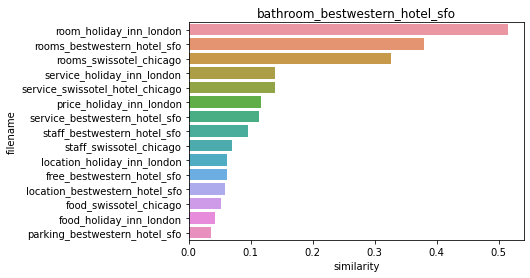

In [79]:
# p.556~557
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 첫 번째 문서와 타 문서간 유사도가 큰 순을 정렬한 인덱스를 추출하되 자기 자신은 제외
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:,1:]

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재정렬
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 값을 재정렬, 자기자신 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도값을 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value
print('가장 유사도가 큰 파일명 및 유사도:\n', hotel_1_sim_df.iloc[0,:])

sns.barplot(x='similarity', y='filename', data=hotel_1_sim_df)
plt.title(comparison_docname)

## 한글 텍스트 처리 - 네이버 영화 평점 감성 분석

### KoNLPy

- KoNLPy 설치방법 p.559~562

### 데이터 로딩

In [85]:
# p.563
import pandas as pd

train_df = pd.read_csv('./dataset/ratings_train.txt', sep='\t')
train_df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다,1


In [86]:
train_df['label'].value_counts()

0    75173
1    74827
Name: label, dtype: int64

In [87]:
import re

train_df = train_df.fillna(' ')
# 정규 표현식을 이용해 숫자를 공백으로 변경(정규 표현식 \d(숫자))
train_df['document'] = train_df['document'].apply(lambda x:re.sub(r"\d+"," ",x))

# 테스트 데이터 세트를 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df = pd.read_csv('./dataset/ratings_test.txt', sep='\t')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply(lambda x: re.sub(r"\d+"," ", x))

# id 칼럼 삭제 수행
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

In [92]:
# 각 문장을 형태소 단어로 토큰화
from konlpy.tag import Okt

okt = Okt()
def okt_tokenizer(text) :
    # 입력 인자로 들어온 텍스트를 형태소 단어로 토큰화, 리스트로.
    tokens_ko = okt.morphs(text)
    return tokens_ko

- 아래꺼 도는데 2시간 걸림

In [93]:
# p.564
# TF-IDF 피처 모델 생성
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Okt 객체의 morphs() 객체를 이용한 tokenizer를 사용. ngram_range는 (1,2)
tfidf_vect = TfidfVectorizer(tokenizer=okt_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

In [95]:
# 로지스틱 회귀를 이용해 감성분석 분류 수행
lg_clf = LogisticRegression(random_state=0, solver='liblinear')

# 로지스틱 회귀의 하이퍼 파라미터 C의 최적화를 위해 GridSearchCV 이용
params = {'C': [1, 3.5, 4.5, 5.5, 10]}
grid_cv = GridSearchCV(lg_clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv.fit(tfidf_matrix_train, train_df['label'])
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))
# C가 3.5일 때 최고 정확도 0.8593

Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'C': 3.5} 0.8593


In [97]:
# p.565
from sklearn.metrics import accuracy_score

# 학습 데이터를 적용한 TfidfVectorizer를 이용해 테스트 데이터를 TF-IDF 값으로 피처 변환
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

# classifier는 GridSearchCV에서 최적 파라미터로 학습된 classifier 그대로 이용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도: ', accuracy_score(test_df['label'], preds))

Logistic Regression 정확도:  0.86172
